In [6]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load raw data
training_data = np.load('data_for_baselines_1000_training.npy')  # shape: (number_of_samples, 1)
testing_data = np.load('data_for_baselines_1000.npy')  # shape: (number_of_samples, 1)
testing_labels = np.load('labels_for_baselines_1000.npy')  # shape: (number_of_samples,)

# Train the anomaly detection model on raw data
baseline_anomaly_detector = IsolationForest(contamination=0.4)  # Adjust contamination parameter based on your needs
baseline_anomaly_detector.fit(training_data)

# Predict on the test dataset
baseline_predictions = baseline_anomaly_detector.predict(testing_data)
# Convert IsolationForest predictions to match your label format
baseline_predictions = np.where(baseline_predictions == 1, 0, 1)

# Evaluate the baseline model
print("Baseline Model Performance (Without Representation Learning):")
print(classification_report(testing_labels, baseline_predictions, target_names=["Benign", "Attack"]))


# Calculate additional metrics
accuracy = accuracy_score(testing_labels, baseline_predictions)
tn, fp, fn, tp = confusion_matrix(testing_labels, baseline_predictions).ravel()
fn_rate = fn / (fn + tp)
fp_rate = fp / (fp + tn)

print(f"Accuracy: {accuracy:.2f}")
print(f"False Negative Rate: {fn_rate:.2f}")
print(f"False Positive Rate: {fp_rate:.2f}")

Baseline Model Performance (Without Representation Learning):
              precision    recall  f1-score   support

      Benign       0.50      1.00      0.67      5000
      Attack       0.00      0.00      0.00      5000

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000

Accuracy: 0.50
False Negative Rate: 1.00
False Positive Rate: 0.00


/home/binghui/anaconda3/envs/backdoor-attack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/binghui/anaconda3/envs/backdoor-attack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/binghui/anaconda3/envs/backdoor-attack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Baseline Model Performance (Without Representation Learning):
              precision    recall  f1-score   support

      Benign       0.50      1.00      0.67      5000
      Attack       0.00      0.00      0.00      5000

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000

Accuracy: 0.50
False Negative Rate: 1.00
False Positive Rate: 0.00


/home/binghui/anaconda3/envs/backdoor-attack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/binghui/anaconda3/envs/backdoor-attack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/binghui/anaconda3/envs/backdoor-attack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

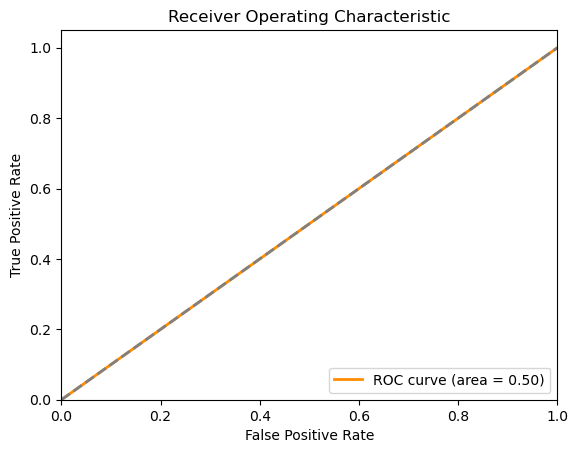

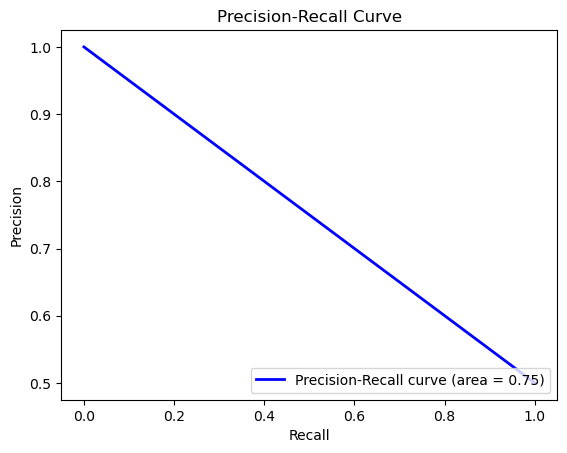

In [7]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load raw data
training_data = np.load('data_for_baselines_1000_training.npy')  # shape: (number_of_samples, 1)
testing_data = np.load('data_for_baselines_1000.npy')  # shape: (number_of_samples, 1)
testing_labels = np.load('labels_for_baselines_1000.npy')  # shape: (number_of_samples,)

# Train the anomaly detection model on raw data
baseline_anomaly_detector = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination parameter and set random_state for reproducibility
baseline_anomaly_detector.fit(training_data)

# Predict on the test dataset
baseline_predictions = baseline_anomaly_detector.predict(testing_data)
# Convert IsolationForest predictions to match your label format
baseline_predictions = np.where(baseline_predictions == 1, 0, 1)

# Evaluate the baseline model
print("Baseline Model Performance (Without Representation Learning):")
print(classification_report(testing_labels, baseline_predictions, target_names=["Benign", "Attack"]))

# Calculate additional metrics
accuracy = accuracy_score(testing_labels, baseline_predictions)
tn, fp, fn, tp = confusion_matrix(testing_labels, baseline_predictions).ravel()
fn_rate = fn / (fn + tp)
fp_rate = fp / (fp + tn)

print(f"Accuracy: {accuracy:.2f}")
print(f"False Negative Rate: {fn_rate:.2f}")
print(f"False Positive Rate: {fp_rate:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(testing_labels, baseline_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(testing_labels, baseline_predictions)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


In [12]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Load raw data
training_data = np.load('data_points_benign_training.npy')  # shape: (number_of_samples, 1)
testing_data = np.load('data_points_testing.npy')  # shape: (number_of_samples, 1)
testing_labels = np.load('labels_testing.npy')  # shape: (number_of_samples,)
# Verify and reshape the data if necessary
if len(training_data.shape) > 2:
    training_data = training_data.reshape(training_data.shape[0], -1)
if len(testing_data.shape) > 2:
    testing_data = testing_data.reshape(testing_data.shape[0], -1)
# # Convert labels to binary (1 for anomaly, 0 for normal)
# labels_binary = np.where(labels == 1, 1, 0)
# Train the anomaly detection model on raw data
baseline_anomaly_detector = IsolationForest(contamination=0.45)  # Adjust contamination parameter based on your needs
baseline_anomaly_detector.fit(training_data)

# Predict on the test dataset
baseline_predictions = baseline_anomaly_detector.predict(testing_data)
# Convert IsolationForest predictions to match your label format
baseline_predictions = np.where(baseline_predictions == 1, 0, 1)

# Evaluate the baseline model
print("Baseline Model Performance (Without Representation Learning):")
print(classification_report(testing_labels, baseline_predictions, target_names=["Benign", "Attack"]))

Baseline Model Performance (Without Representation Learning):
              precision    recall  f1-score   support

      Benign       0.50      1.00      0.67      5000
      Attack       0.00      0.00      0.00      5000

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



/home/binghui/anaconda3/envs/backdoor-attack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/binghui/anaconda3/envs/backdoor-attack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/binghui/anaconda3/envs/backdoor-attack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,